## Image Processing

#### Color Mappings

- So far we worked with RGB color spaces
- There are some other models like HSL (Hue, Saturation, Lightness) and
HSV(Hue, Saturation and Value)
- HSL and HSV are more aligned with human vision actually perceives
- While in this course we deal with RGB images, its a good idea to understand about HSV and HSL colorspaces

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

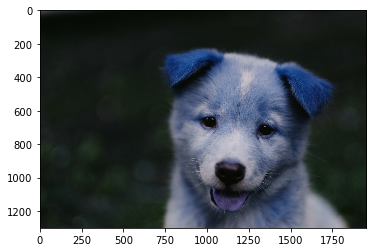

In [2]:
# read image
img = cv2.imread('Data/puppy.jpg') ## BGR (Blue,Green,Red)
plt.imshow(img) # RGB

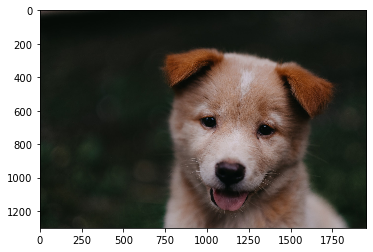

In [3]:
# converting to RGB
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

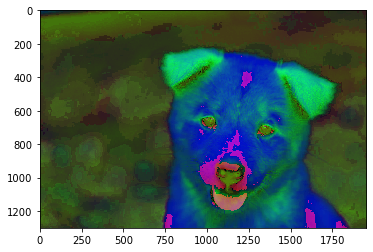

In [4]:
# converting to HSV
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2HSV))

#### Blending and Pasting Images

In [5]:
# read 2 images to blend
img1 = cv2.cvtColor(cv2.imread('Data/dog_backPack.png'),cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('Data/watermark_no_copy.png'),cv2.COLOR_BGR2RGB)

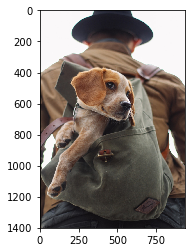

In [6]:
# show 1st image
plt.imshow(img1)

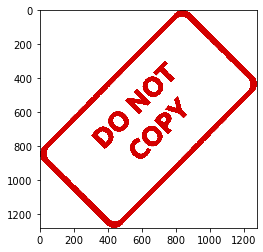

In [7]:
# show 2nd image
plt.imshow(img2)

In [8]:
img1.shape

(1401, 934, 3)

In [9]:
img2.shape

(1280, 1277, 3)

In [10]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

In [11]:
img1.shape

(1200, 1200, 3)

In [12]:
img2.shape

(1200, 1200, 3)

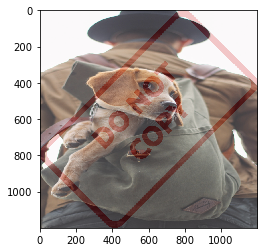

In [13]:
# blending images of same size

blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.2,gamma=0)
plt.imshow(blended)

alpha * pixel_1(image1) + beta * pixel_2(image2) + gamma

In [14]:
# resize to equal sizes
img2 = cv2.resize(img2,(600,600))

In [15]:
large = img1
small = img2

In [16]:
# starting point
x_offset = 0
y_offset = 0

In [17]:
# ending point
x_end = 0 + 600
y_end = 0 + 600

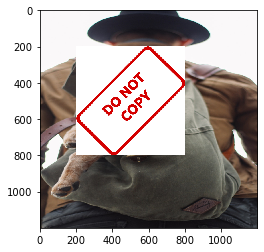

In [18]:
# blend images
large[200:800,200:800] = small
plt.imshow(large)

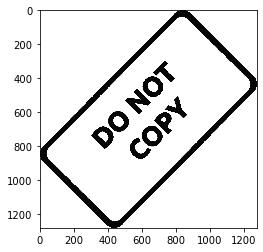

In [19]:
# read do not copy image in grayscale
img_gray = cv2.imread('Data/watermark_no_copy.png',0)
plt.imshow(img_gray,cmap='gray')

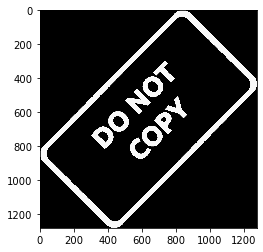

In [20]:
# perform bitwise not operation
mask = cv2.bitwise_not(img_gray)
plt.imshow(mask,cmap='gray')

In [21]:
# create an image with white background
white_img = np.full((600,600,3),255,dtype=np.uint8)

In [22]:
white_img.shape

(600, 600, 3)

In [23]:
mask = cv2.resize(mask,(600,600))

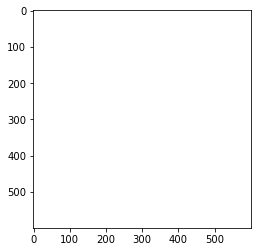

In [24]:
plt.imshow(white_img)

In [25]:
# perform bitwise or 
whitemask = cv2.bitwise_or(white_img,white_img,mask=mask)

In [26]:
mask.shape

(600, 600)

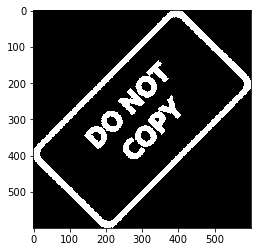

In [27]:
plt.imshow(whitemask)

#### Image Threshodling

- Thresholding is fundamentally a very simple method of segmenting an image into different parts
- Threshodling will convert an image to white or black

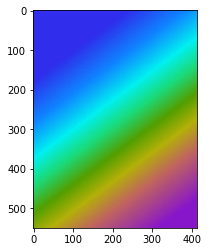

In [28]:
# read in rainbow image
rainbow = cv2.imread('Data/rainbow.jpg')
plt.imshow(rainbow)

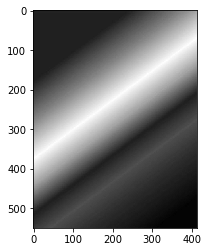

In [29]:
# read as grayscale
rainbowgray = cv2.imread('Data/rainbow.jpg',0)
plt.imshow(rainbowgray,cmap='gray')

###### Threshold types

In [30]:
# apply binary threshold
_,threshold = cv2.threshold(rainbowgray,thresh=127,maxval = 255, type= cv2.THRESH_BINARY)

In [31]:
_

127.0

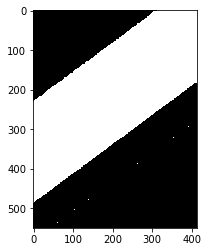

In [32]:
# show image
plt.imshow(threshold,cmap='gray')

In [40]:
# apply binary inverse threshold
_,threshold = cv2.threshold(rainbowgray,thresh=127,maxval = 255, type= cv2.THRESH_BINARY_INV)

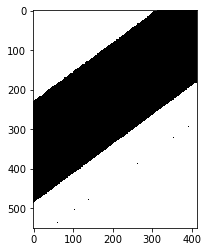

In [42]:
plt.imshow(threshold,cmap='gray')

In [43]:
# apply threshold truncated
_,threshold = cv2.threshold(rainbowgray,thresh=127,maxval = 255, type= cv2.THRESH_TRUNC)

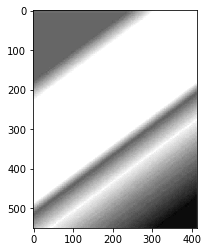

In [45]:
plt.imshow(threshold,cmap='gray')

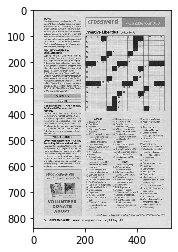

In [47]:
# read cross word image
crossword = cv2.imread('Data/crossword.jpg',0)
plt.imshow(crossword,cmap='gray')

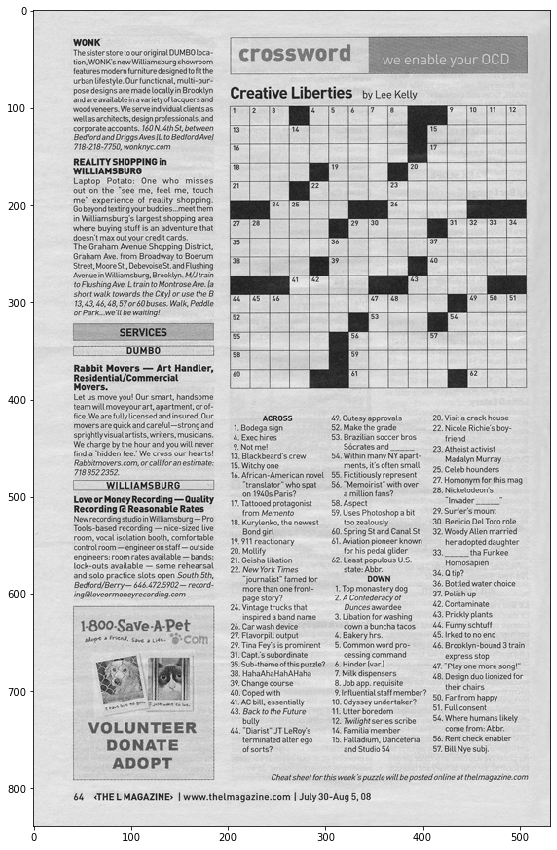

In [48]:
# show image using plt
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(crossword,cmap='gray')

In [51]:
# apply normal threshold
ret,threshold2 = cv2.threshold(crossword,127,255,type=cv2.THRESH_BINARY)

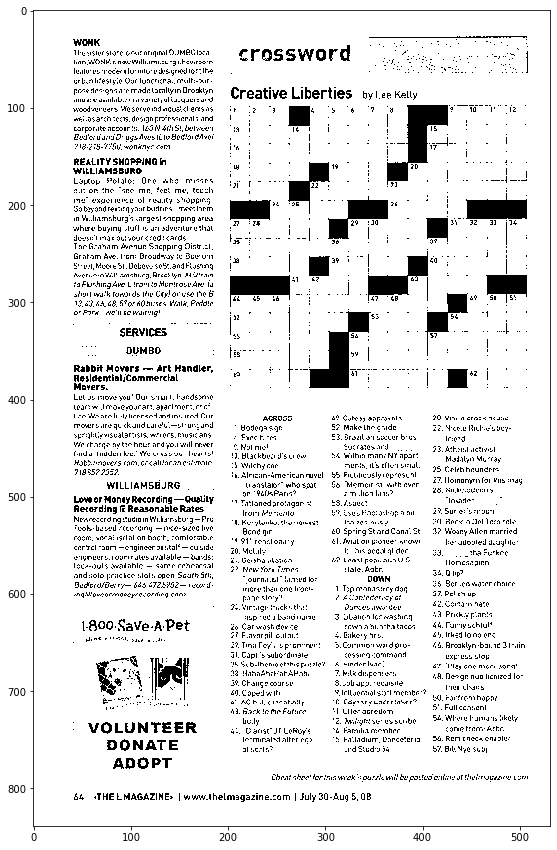

In [52]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(threshold2,cmap='gray')

In [55]:
# apply adaptive threshold
threshold3 = cv2.adaptiveThreshold(crossword,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,10)

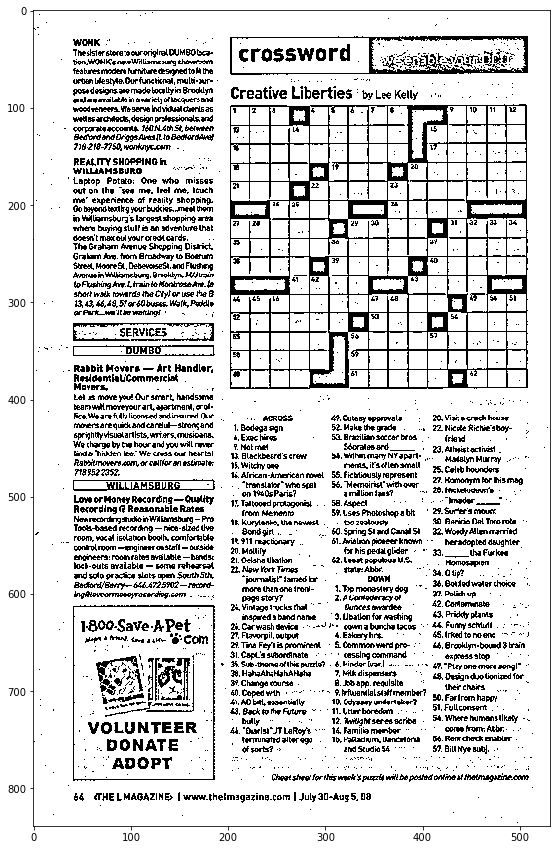

In [56]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(threshold3,cmap='gray')

In [57]:
# add the above two thresholds
combine = cv2.addWeighted(threshold2,0.5,threshold3,0.5,0)

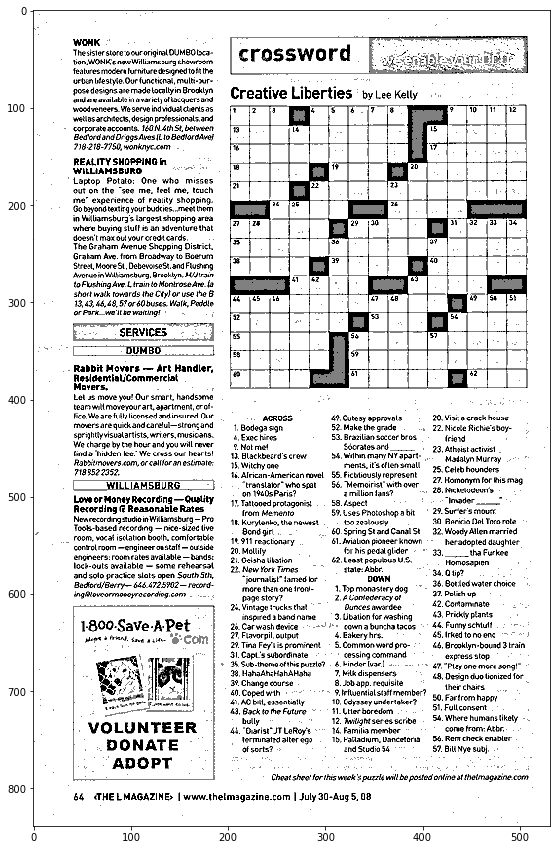

In [58]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(combine,cmap='gray')